# General data reader for AQUA 
## Additional data sources

We added a few new data sources to the intake catalogue, pointing to resources already available at DKRZ.

### Inspecting available datasets

Multiple datasets area available also for observations, so that we can also inspect the catalogue by checking what is inside. This can be done with the `inspect_catalogue` function

In [1]:
from aqua import catalogue, inspect_catalogue
cat = catalogue()

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-mon	LRA monthly data 1x1 deg regular grid
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- lra-r100-mon	LRA monthly data 1x1 deg regular grid
IFS	test-tco2559	4km experiment, coupled with FESOM
	- ICMGG_atm2d	2d output
	- ICMU_atm3d	3d output
IFS	test-tco79	TCO79 test data
	- short	original 2d output
	- long	coarse IFS data 1y

FESOM	tco3999-ng5	2.5km experiment,

Here below a short exploration at catalogue, model and experiment level

In [2]:
inspect_catalogue(cat)

Models available in catalogue:


['IFS', 'FESOM', 'ICON', 'MSWEP', 'ERA5', 'CERES', 'AVISO', 'PHC3', 'WOA18']

In [3]:
inspect_catalogue(cat, model = 'CERES')

Experiments available in catalogue for model CERES:


['ebaf-toa41', 'ebaf-toa42', 'ebaf-sfc41', 'syn-toa41']

In [5]:
inspect_catalogue(cat, model = 'CERES', exp = 'ebaf-toa41')

Sources available in catalogue for model CERES and exp ebaf-toa41:


['monthly']

### MSWEP precipitation data

MSWEP is a high-quality and very high resolution (5km) dataset available [here](http://www.gloh2o.org/mswep/). We download the MSWEP data archive to be used to provide an observational reference dataset for precipitation. Data are available at 3hourly, daily and monthly time resolutions.

In [2]:
from aqua import Reader
reader = Reader(model="MSWEP", exp="past", source="monthly")

(there is also a "monthlyz" source, which is an experimental zarr version mapped with kerchunk)

In [3]:
data = reader.retrieve()

The fixer (on by default) has renamed the MSWEP `precipitation` variable to `tprate` and converted it to SI units (it was monthly cumulated precipitation).

In [5]:
data.tprate

<xarray.DataArray 'tprate' (time: 502, lat: 1800, lon: 3600)>
dask.array<mul, shape=(502, 1800, 3600), dtype=float32, chunksize=(1, 1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
  * lat      (lat) float32 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * time     (time) datetime64[ns] 1979-02-01 1979-03-01 ... 2020-11-01
Attributes:
    units:         m s**-1
    history:       2023-05-15 22:27:08 variable renamed by AQUA fixer;\n2023-...
    paramId:       172228
    long_name:     Mean total precipitation rate
    cfVarName:     tprate
    shortName:     tprate
    target_units:  m s**-1
    factor:        3.802570537683474e-10
    offset:        0
    src_units:     mm month-1
    units_fixed:   1

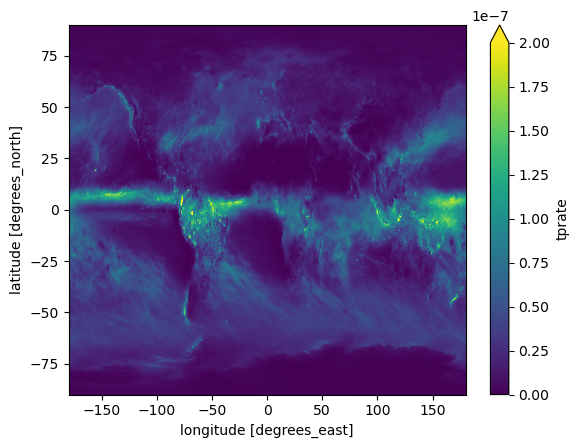

In [6]:
data.tprate.isel(time=[0,1,2,3]).mean("time").plot(vmin=0, vmax=2*1e-7)

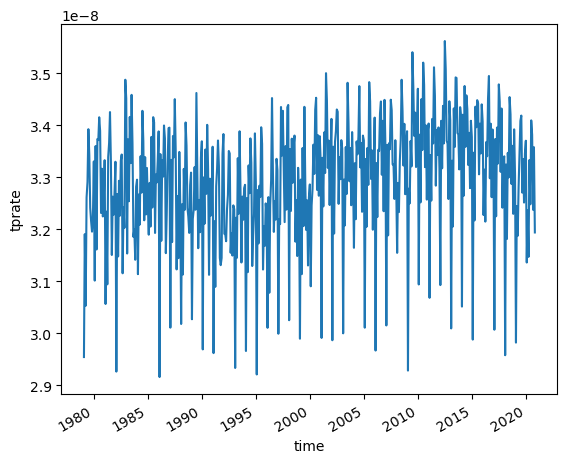

In [7]:
reader.fldmean(data.tprate).plot()

### AVISO SSH data

In [6]:
from aqua import Reader
reader = Reader(model="AVISO", exp="ssh-L4", source="daily")
data = reader.retrieve()
data

2023-05-02 10:31:35 :: Reader :: WARNING  -> No fixes defined for model AVISO


<xarray.Dataset>
Dimensions:         (time: 10766, latitude: 720, longitude: 1440, nv: 2)
Coordinates:
  * latitude        (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude       (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * nv              (nv) int32 0 1
  * time            (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2022-06-23
Data variables: (12/14)
    adt             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    crs             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    err_sla         (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_ugosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    err_vgosa       (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    flag_ice        (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...              ...
    sla             (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    tpa_correction  (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ugos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ugosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgos            (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    vgosa           (time, latitude, longitude) float64 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         http://climate.copernicus.eu/c3s-user-se...
    creator_email:                   http://climate.copernicus.eu/c3s-user-se...
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               1993-01-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-12-31T12:00:00Z
    title:                           DT merged two satellites Global Ocean Gr...

We can then plot some of the dataset variables as

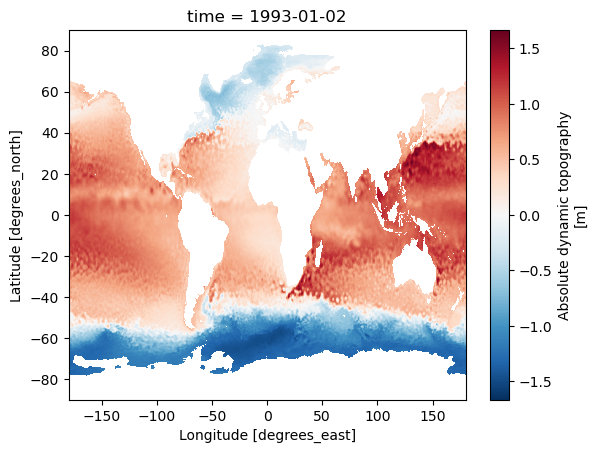

In [7]:
data['adt'][1,:,:].plot()

### CERES radiation data

Similarly, radiation data is available accessing CERES data, both energy balanced ("EBAF") and not ("SYN"). However, correction has been applied to SYN so that they can be considerebe reliable for model evaluation

In [8]:
from aqua import Reader
reader = Reader(model="CERES", exp="ebaf-toa42", source="monthly")
data = reader.retrieve()

The 2d plot of the June TOA net radiation can be easily produced like this

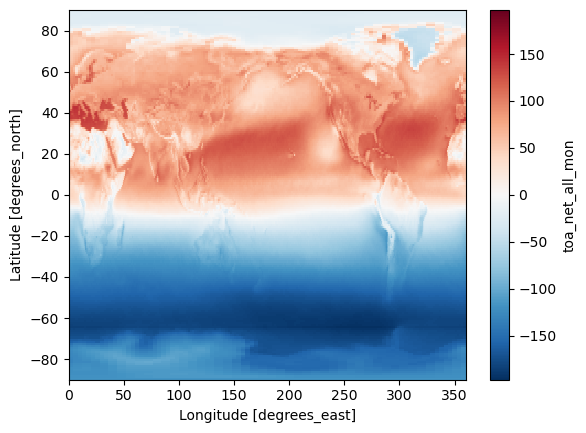

In [9]:
data['toa_net_all_mon'].sel(time=data.time.dt.month==6).mean(dim='time').plot()

Similarly, we can access to the SYN daily data

In [10]:

reader = Reader(model="CERES", exp="syn-toa41", source="daily")
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:                 (time: 7670, lon: 360, lat: 180)
Coordinates:
  * time                    (time) datetime64[ns] 2001-01-01T12:00:00 ... 202...
  * lon                     (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * lat                     (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables:
    toa_sw_all_daily        (time, lat, lon) float32 dask.array<chunksize=(2443, 180, 360), meta=np.ndarray>
    toa_lw_all_daily        (time, lat, lon) float32 dask.array<chunksize=(2443, 180, 360), meta=np.ndarray>
    toa_net_all_daily       (time, lat, lon) float32 dask.array<chunksize=(2443, 180, 360), meta=np.ndarray>
    toa_lw_all_daily_eb     (time, lat, lon) float32 dask.array<chunksize=(2443, 180, 360), meta=np.ndarray>
    toa_sw_all_daily_eb     (time, lat, lon) float32 dask.array<chunksize=(2443, 180, 360), meta=np.ndarray>
    toa_solar_all_daily_eb  (time, lat, lon) float32 dask.array<chunksize=(2443, 180, 360), meta=np.ndarray>
    mtntrf                  (time, lat, lon) float32 dask.array<chunksize=(2443, 180, 360), meta=np.ndarray>
    mtnsrf                  (time, lat, lon) float32 dask.array<chunksize=(2443, 180, 360), meta=np.ndarray>
Attributes:
    title:        CERES SYN1deg Daily data
    institution:  NASA Langley Research Center
    Conventions:  CF-1.4
    comment:       
    Version:      Edition 4.1: Release Date August 22, 2019
    DOI:          10.5067/Terra+Aqua/CERES/SYN1degDay_L3.004A
    Fill_Value:   Fill Value is -999.0
    history:      2023-05-02 10:32:46 retrieved by AQUA retriever;\n2023-05-0...

We can easily plot a timeseries of daily data using the reader fldmean options

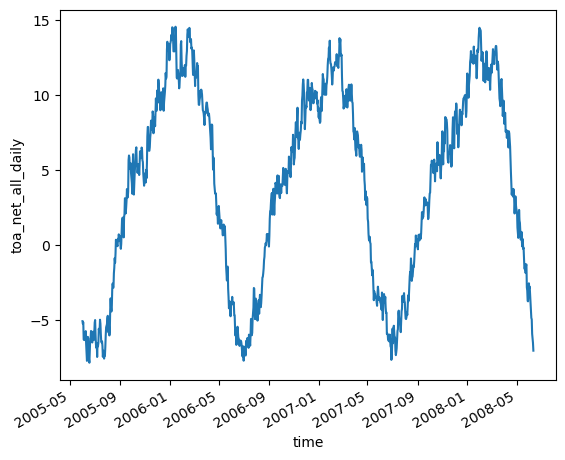

In [ ]:
reader.fldmean(data['toa_net_all_daily'].sel(time=slice("2005-06-01", "2008-06-10"))).plot()


# WOA18

Also some oceanic dataset is now available, on multiple levels

In [13]:
from aqua import Reader
reader = Reader(model="WOA18", exp="woa18_2005_2017", source="annual")
woa = reader.retrieve()
woa

2023-05-02 10:35:06 :: Reader :: WARNING  -> No fixes defined for model WOA18


<xarray.Dataset>
Dimensions:             (lat: 720, nbounds: 2, lon: 1440, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon                 (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 726.0
Dimensions without coordinates: nbounds
Data variables: (12/19)
    crs                 int32 -2147483647
    lat_bnds            (lat, nbounds) float32 dask.array<chunksize=(720, 2), meta=np.ndarray>
    lon_bnds            (lon, nbounds) float32 dask.array<chunksize=(1440, 2), meta=np.ndarray>
    depth_bnds          (depth, nbounds) float32 dask.array<chunksize=(102, 2), meta=np.ndarray>
    climatology_bounds  (time, nbounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    s_an                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 102, 720, 1440), meta=np.ndarray>
    ...                  ...
    t_mn                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 102, 720, 1440), meta=np.ndarray>
    t_dd                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 102, 720, 1440), meta=np.ndarray>
    t_sd                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 102, 720, 1440), meta=np.ndarray>
    t_se                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 102, 720, 1440), meta=np.ndarray>
    t_oa                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 102, 720, 1440), meta=np.ndarray>
    t_gp                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 102, 720, 1440), meta=np.ndarray>
Attributes: (12/50)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_salin...
    summary:                         Climatological mean salinity for the glo...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29 
    history:                         2023-05-02 10:35:06 retrieved by AQUA re...

The interpolation on multiple levels is supported, although the level must be specified when calling the reader. This is currently being further developed. 

In [18]:
from aqua import Reader
reader = Reader(model="WOA18", exp="woa18_2005_2017", source="annual", regrid='r100', var='t_an', level=15)
woa = reader.retrieve()
woa

2023-05-02 10:44:28 :: Reader :: WARNING  -> Weights file not found: /work/bb1153/b382075/nextgems/weights/weights_WOA18_woa18_2005_2017_annual_ycon_r100_l15.nc
2023-05-02 10:44:28 :: Reader :: WARNING  -> Attempting to generate it ...
2023-05-02 10:44:28 :: Reader :: WARNING  -> Source grid: /pool/data/AWICM/FESOM2/INITIAL/WOA18/WOA18_2005_2017/woa18_A5B7_t00_04.nc
2023-05-02 10:44:34 :: Reader :: WARNING  -> Success!
2023-05-02 10:44:34 :: Reader :: WARNING  -> No fixes defined for model WOA18


<xarray.Dataset>
Dimensions:  (time: 1, lat: 720, lon: 1440)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    depth    float32 75.0
  * time     (time) float32 726.0
Data variables:
    t_an     (time, lat, lon) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/50)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_salin...
    summary:                         Climatological mean salinity for the glo...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29 
    history:                         2023-05-02 10:44:34 retrieved by AQUA re...

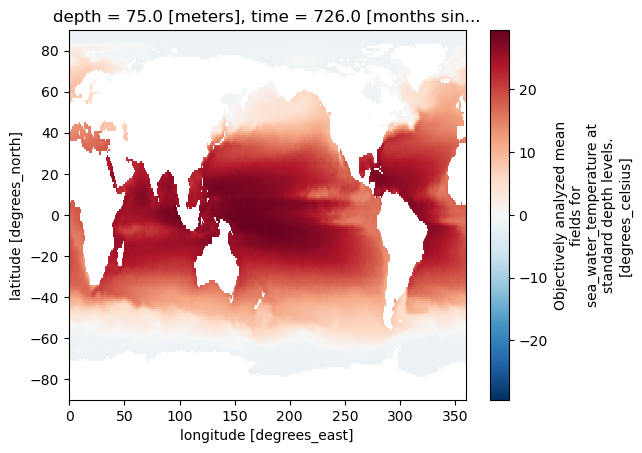

In [19]:
out = reader.regrid(woa)
out['t_an'][:,:].plot()

### Experimental access to an external intake-esm catalogue (the Dyamond-Nextgems catalogue)

This is to test direct access through the reader to data which are indexed through an externa intake-esm (not intake) catalogue. The idea is still the same: we include it in our intake catalogue, but we also add already some search parameters. Please check the "intake-esm-test" source in ngc2009.yaml.

In [ ]:
from aqua import Reader
reader = Reader(model="ICON", exp="ngc2009", source="intake-esm-test")
data = reader.retrieve()

/work/bb1153/b382076/mambaforge/envs/aqua/lib/python3.10/site-packages/xarray/core/indexing.py:1384: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/work/bb1153/b382076/mambaforge/envs/aqua/lib/python3.10/site-packages/xarray/core/indexing.py:1384: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return 

In [ ]:
data

<xarray.Dataset>
Dimensions:                        (time: 36722, ncells: 20971520, height: 1,
                                    height_2: 1)
Coordinates:
  * time                           (time) datetime64[ns] 2020-01-20 ... 2022-...
  * height                         (height) float64 2.0
  * height_2                       (height_2) float64 10.0
Dimensions without coordinates: ncells
Data variables:
    hydro_canopy_cond_limited_box  (time, ncells) float32 dask.array<chunksize=(49, 20971520), meta=np.ndarray>
    hydro_w_snow_box               (time, ncells) float32 dask.array<chunksize=(49, 20971520), meta=np.ndarray>
    hydro_snow_soil_dens_box       (time, ncells) float32 dask.array<chunksize=(49, 20971520), meta=np.ndarray>
    msl                            (time, ncells) float32 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    sp                             (time, ncells) float32 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    sithick                        (time, ncells) float32 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    ci                             (time, ncells) float32 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    2t                             (time, height, ncells) float32 dask.array<chunksize=(1, 1, 20971520), meta=np.ndarray>
    skt                            (time, ncells) float32 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
    10u                            (time, height_2, ncells) float32 dask.array<chunksize=(1, 1, 20971520), meta=np.ndarray>
    10v                            (time, height_2, ncells) float32 dask.array<chunksize=(1, 1, 20971520), meta=np.ndarray>
    cfh_lnd                        (time, ncells) float32 dask.array<chunksize=(1, 20971520), meta=np.ndarray>
Attributes:
    uuidOfHGrid:             0f1e7d66-637e-11e8-913b-51232bb4d8f9
    CDI:                     Climate Data Interface version 1.8.3rc (http://m...
    title:                   ICON simulation
    intake_esm_varname:      hydro_canopy_cond_limited_box\nhydro_w_snow_box\...
    Conventions:             CF-1.6
    grid_file_uri:           http://icon-downloads.mpimet.mpg.de/grids/public...
    history:                 ./icon at 20220512 152214\n./icon at 20220512 19...
    source:                  git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded69...
    references:              see MPIM/DWD publications
    number_of_grid_used:     15
    institution:             Max Planck Institute for Meteorology/Deutscher W...
    intake_esm_dataset_key:  nextGEMS.MPI-M.ICON-ESM.nextgems_cycle2.ngc2009....

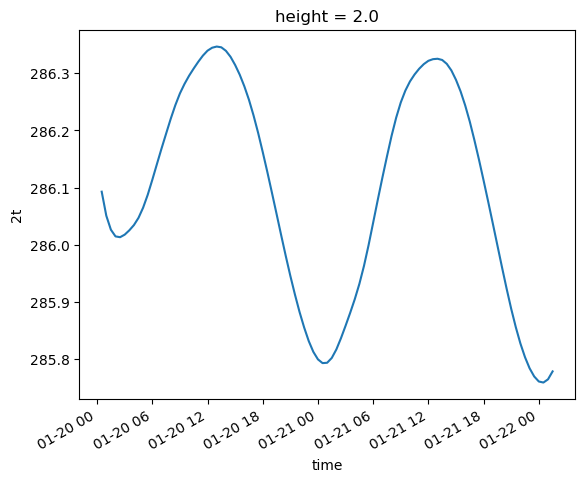

In [ ]:
tas1 = data['2t'][1:100,0,:]
global_mean = reader.fldmean(tas1)
global_mean.plot()

### Access to ERA5 data

The intake-esm functionality allows us also to access the ERA5 data on levante. Variables have been split for now in two sources ("monthly_inst" for instantaneous variables and "monthly_acc" for fluxes)

In [ ]:
from aqua import Reader
reader = Reader(model="ERA5", exp="era5", source="monthly_inst")
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:                  (time: 516, values: 542080)
Coordinates:
    realization              int64 0
    forecast_reference_time  (time) datetime64[ns] 1979-01-01 ... 2021-12-01
    leadtime                 timedelta64[ns] 00:00:00
    surface                  float64 0.0
    lat                      (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    lon                      (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
  * time                     (time) datetime64[ns] 1979-01-01 ... 2021-12-01
Dimensions without coordinates: values
Data variables: (12/15)
    d2m                      (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    hcc                      (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    lcc                      (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    lsm                      (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    mcc                      (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    msl                      (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    ...                       ...
    sp                       (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    t2m                      (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    tcw                      (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    u10                      (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    v10                      (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
    z                        (time, values) float32 dask.array<chunksize=(1, 542080), meta=np.ndarray>
Attributes:
    institution:             European Centre for Medium-Range Weather Forecasts
    Conventions:             CF-1.7
    GRIB_subCentre:          0
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_centre:             ecmf
    history:                 2023-04-12T11:13 GRIB to CDM+CF via cfgrib-0.9.1...
    GRIB_edition:            1
    intake_esm_varname:      d2m\nhcc\nlcc\nlsm\nmcc\nmsl\nsd\nsiconc\nskt\ns...
    intake_esm_dataset_key:  128.0.avgua.surface.monthly

In [ ]:
data.t2m

<xarray.DataArray 't2m' (time: 516, values: 542080)>
dask.array<concatenate, shape=(516, 542080), dtype=float32, chunksize=(1, 542080), chunktype=numpy.ndarray>
Coordinates:
    realization              int64 0
    forecast_reference_time  (time) datetime64[ns] 1979-01-01 ... 2021-12-01
    leadtime                 timedelta64[ns] 00:00:00
    surface                  float64 0.0
    lat                      (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    lon                      (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
  * time                     (time) datetime64[ns] 1979-01-01 ... 2021-12-01
Dimensions without coordinates: values
Attributes: (12/21)
    GRIB_paramId:                    167
    GRIB_dataType:                   an
    GRIB_numberOfPoints:             542080
    GRIB_typeOfLevel:                surface
    GRIB_stepUnits:                  1
    GRIB_stepType:                   avgua
    ...                              ...
    GRIB_shortName:                  2t
    GRIB_totalNumber:                0
    GRIB_units:                      K
    long_name:                       2 metre temperature
    units:                           K
    standard_name:                   unknown

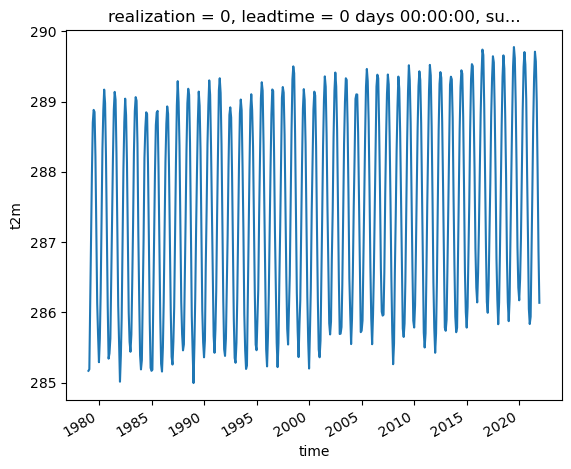

In [ ]:
global_mean = reader.fldmean(data.t2m)
global_mean.plot()

### OSI-SAF sea-ice concentration data 

In [1]:
from aqua import Reader
reader = Reader(model="OSI-SAF", exp="osi-450", source="sh", rebuild="true")
data = reader.retrieve(fix=False)

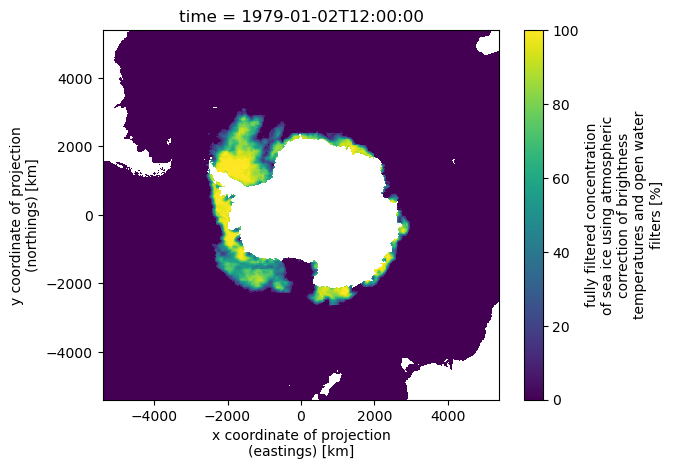

In [3]:
data.ice_conc.isel(time=0).plot()

In [3]:
reader.fldmean(data.ice_conc.isel(time=0)).values

array(5.01453527)